In [341]:
# importing necessary moduls
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
import tensorflow as tf
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

In [172]:
# importing data
data = pd.read_csv('./dataset/census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Finding Donors for CharityML

####  Project Description

This project aims to help CharityML, a fictitious charity organization, identify individuals who are most likely to donate to their cause. The dataset used in this project tests how donors respond to new information about a charity’s effectiveness. Specifically, it examines the impact of including scientific research on the program’s effectiveness in direct marketing solicitations.

#### Objectives
##### The primary objectives of this project are:

1. Predict Donor Likelihood: Build a predictive model to identify individuals who are most likely to donate based on their demographic and socioeconomic attributes.
2. Understand Donor Behavior: Analyze the characteristics of donors to understand the factors that influence their likelihood of donating.
3. Segment Donor Types: Identify and segment donors into warm glow donors and altruism donors based on their response to different types of solicitation information.

dataset:= https://www.kaggle.com/datasets/nancyalaswad90/finding-donors-for-charityml/data

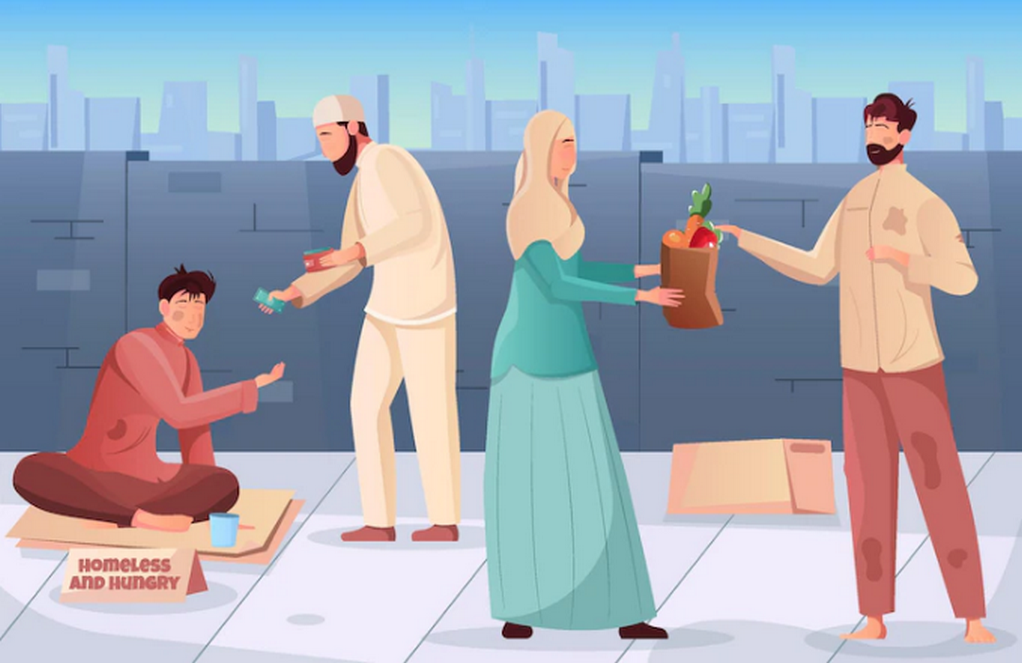

In [173]:
# identify income categories
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

#### There is to catorgories
1. `<=50K` (income less than equal to fifty thousand dolars)
2. `>50K` (income grater than to fifty thousand dolars)

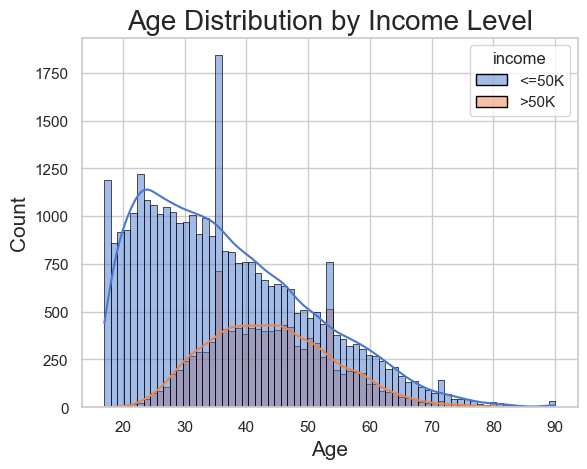

In [174]:
# analysing age of donors
sns.set(style='whitegrid')
sns.histplot(x='age', data=data, hue='income', kde=True, palette='muted', edgecolor='black')
plt.title('Age Distribution by Income Level', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### outcome
The most of donors are with income level less than or equals to 50000 dolars.   
more than 50000 donners are spread all the ages shapes

In [175]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


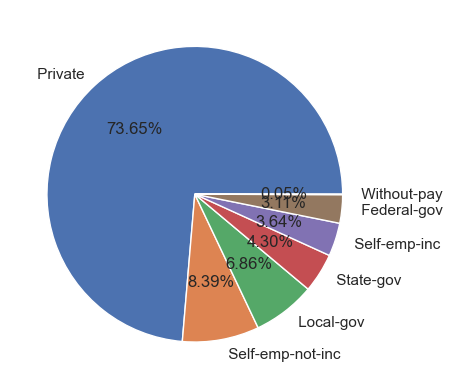

In [176]:
value_workclass = data['workclass'].value_counts()
plt.pie(x = value_workclass.values, labels = value_workclass.index, autopct="%.2f%%")
plt.show()

most of donors work with private sector it is 73.65% percent. Least of donors are with without-pay

In [177]:
sex_data = data['sex'].value_counts()

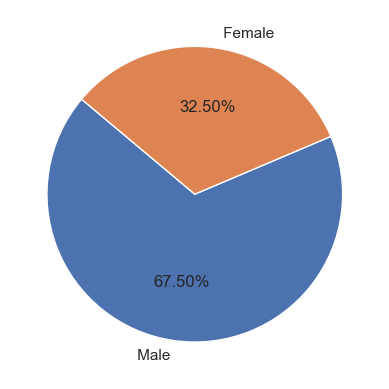

In [178]:
plt.pie(x = sex_data.values, labels = sex_data.index, autopct='%1.2f%%',startangle=140)
plt.show()

Most of donors are male. It is 67.50% percent.

In [179]:
marital_states = data['marital-status'].value_counts()
marital_states

marital-status
 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: count, dtype: int64

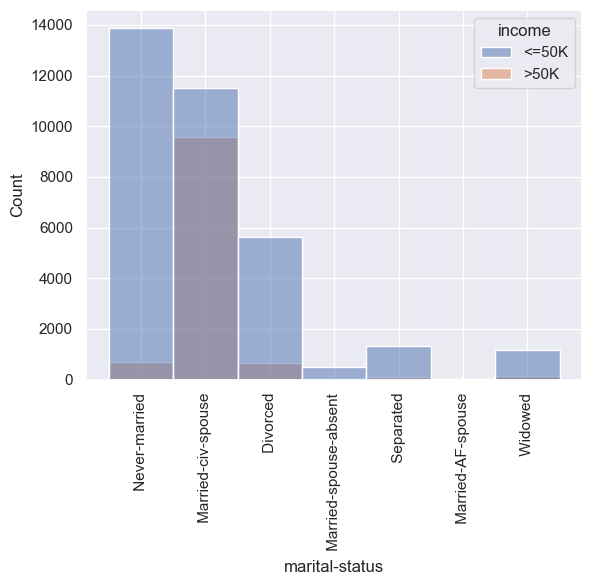

In [180]:
sns.set(style='darkgrid')
sns.histplot(data = data, x='marital-status',
            hue='income')
plt.xticks(rotation=90)
plt.show()

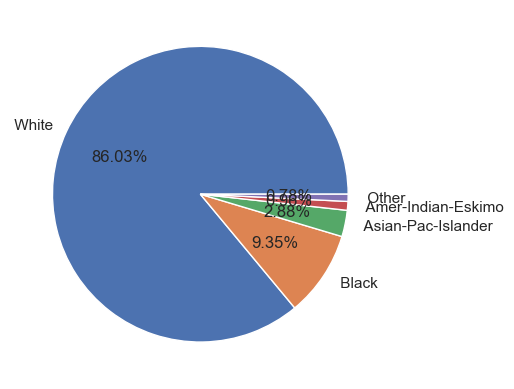

In [181]:
plt.pie(x = data['race'].value_counts().values,
       labels=data['race'].value_counts().index, autopct='%1.2f%%')
plt.show()

### Data preprocessing

In [182]:
data['workclass'].value_counts()

workclass
 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64

In [183]:
lb = LabelEncoder()
data['workclass'] = lb.fit_transform(data['workclass'])

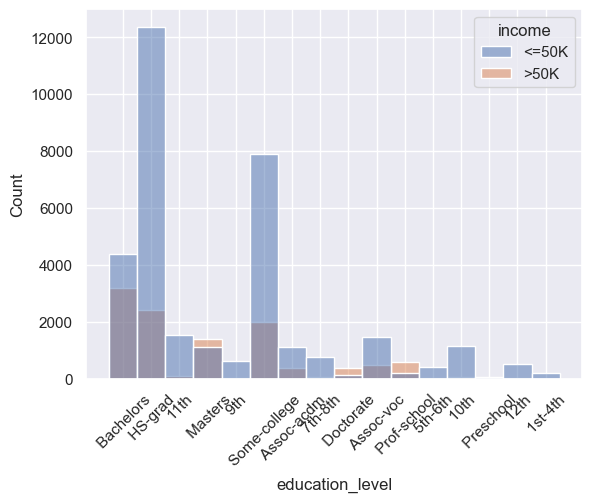

In [184]:
sns.histplot(data = data, x = 'education_level', hue = 'income')
plt.xticks(rotation=45)
plt.show()

In [185]:
data['education_level'] = lb.fit_transform(data['education_level'])
data['marital-status'] = lb.fit_transform(data['marital-status'])
data['occupation'] = lb.fit_transform(data['occupation'])
data['relationship']=lb.fit_transform(data['relationship'])
data['race'] = lb.fit_transform(data['race'])
data['sex'] = lb.fit_transform(data['sex'])
data['native-country'] = lb.fit_transform(data['native-country'])
data['income'] =lb.fit_transform(data['income'])

In [186]:
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,2,9,13.0,4,9,3,4,1,0.0,0.0,40.0,38,0
45218,39,2,9,13.0,0,9,1,4,0,0.0,0.0,36.0,38,0
45219,38,2,9,13.0,2,9,0,4,1,0.0,0.0,50.0,38,0
45220,44,2,9,13.0,0,0,3,1,1,5455.0,0.0,40.0,38,0


### full data analyse

In [187]:
corr = data.corr()

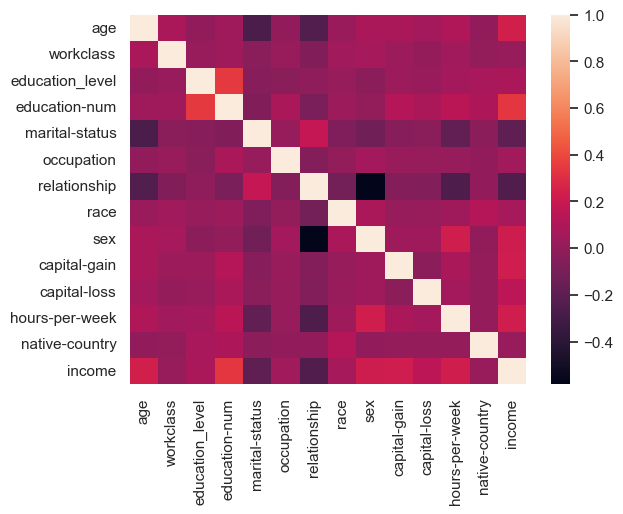

In [192]:
sns.heatmap(corr)
plt.show()

<Axes: >

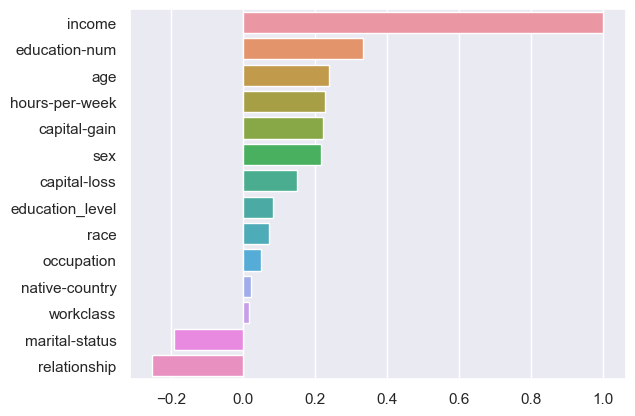

In [211]:
income_corr = corr['income'].sort_values(ascending=False)
sns.barplot(x = income_corr.values,y=income_corr.index)

In [216]:
X = data.drop(['income'], axis=1)
y = data['income']
sc = StandardScaler()
X = sc.fit_transform(X)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [287]:
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_nn.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
    
)


In [255]:
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8122 - loss: 0.3952 - val_accuracy: 0.8328 - val_loss: 0.3568
Epoch 2/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8282 - loss: 0.3625 - val_accuracy: 0.8330 - val_loss: 0.3522
Epoch 3/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8348 - loss: 0.3557 - val_accuracy: 0.8319 - val_loss: 0.3565
Epoch 4/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8316 - loss: 0.3577 - val_accuracy: 0.8357 - val_loss: 0.3530
Epoch 5/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8327 - loss: 0.3529 - val_accuracy: 0.8291 - val_loss: 0.3516
Epoch 6/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8305 - loss: 0.3552 - val_accuracy: 0.8353 - val_loss: 0.3440
Epoch 7/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8393 - loss: 0.3457 - val_accuracy: 0.8367 - val_loss: 0.3464
Epoch 8/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8352 - loss: 0.3502 - val_accuracy: 0.

<Axes: >

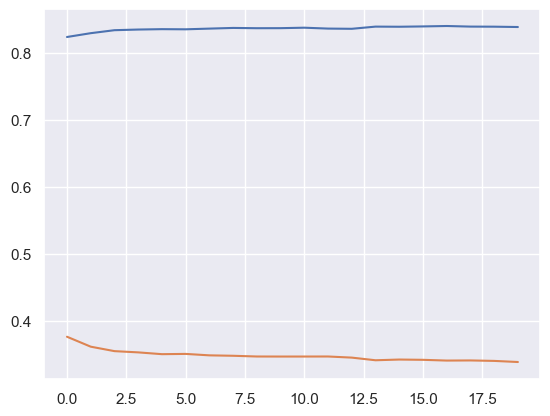

In [256]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['loss'])

In [257]:
y_pred = model_nn.predict(X_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [301]:
y_pred_args = []
for i in y_pred:
    y_pred_args.append(np.round(i[0]))

In [266]:
y_pred

array([[0.48839536],
       [0.11320473],
       [0.30746248],
       ...,
       [0.30067292],
       [0.4124858 ],
       [0.36668524]], dtype=float32)

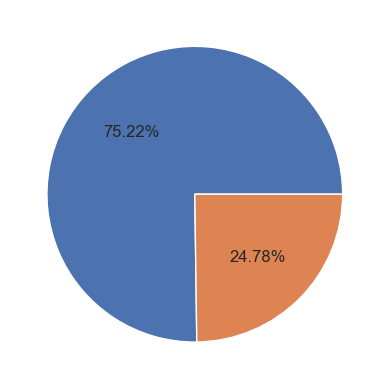

In [281]:
plt.pie(y.value_counts(), autopct='%.2f%%')
plt.show()

In [283]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

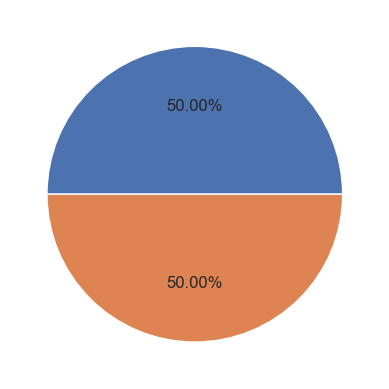

In [286]:
plt.pie(y_train_smote.value_counts(), autopct='%1.2f%%')
plt.show()

In [288]:
history = model_nn.fit(X_train_smote, y_train_smote, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7926 - loss: 0.4411 - val_accuracy: 0.8036 - val_loss: 0.3806
Epoch 2/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8113 - loss: 0.4090 - val_accuracy: 0.7922 - val_loss: 0.3773
Epoch 3/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8108 - loss: 0.4073 - val_accuracy: 0.7807 - val_loss: 0.4023
Epoch 4/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8181 - loss: 0.4012 - val_accuracy: 0.7859 - val_loss: 0.4188
Epoch 5/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8150 - loss: 0.3975 - val_accuracy: 0.7916 - val_loss: 0.4045
Epoch 6/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8166 - loss: 0.3937 - val_accuracy: 0.7796 - val_loss: 0.4101
Epoch 7/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8201 - loss: 0.3884 - val_accuracy: 0.7869 - val_loss: 0.4219
Epoch 8/10
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8204 - loss: 0.3893 - 

In [289]:
y_pred = model_nn.predict(X_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [290]:
y_pred

array([[0.70216215],
       [0.28463075],
       [0.74483037],
       ...,
       [0.68639207],
       [0.5987519 ],
       [0.7682969 ]], dtype=float32)

In [300]:
y_pred_args = []
for i in y_pred:
    y_pred_args.append(int(np.round(i[0])))

<Axes: >

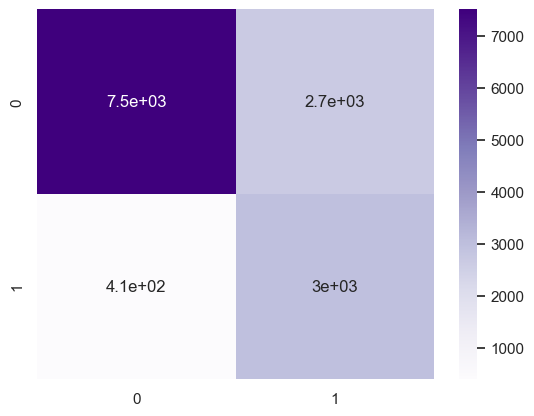

In [309]:
xsns.heatmap(confusion_matrix(y_test, y_pred_args), annot=True, cmap='Purples')

In [358]:
xgb = XGBClassifier()
parameters_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [359]:
grid_search_xgb = GridSearchCV(estimator=xgb,
                              param_grid=parameters_grid,
                              scoring='accuracy',
                              cv=3)

In [360]:
grid_search_xgb.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [361]:
best_mode = grid_search_xgb.best_estimator_

In [362]:
y_pred = best_mode.predict(X_test)

In [363]:
accuracy_score(y_pred , y_test)

0.8463182722783223

<Axes: >

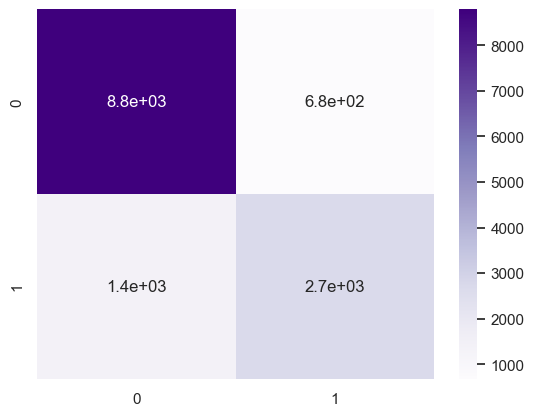

In [367]:
sns.heatmap(confusion_matrix(y_pred, y_test),annot=True, cmap='Purples')